# Correlations of HyperParams-Heuristics

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

## Preamble

In [4]:
datasets_path = Path("../data/hyperopt/datasets.csv")
hyperopt_res_path = Path("../results.test.json")
S2GPP = "mut:5000/akita/s2gpp"

## Read Datasets Overview

In [5]:
datasets = pd.read_csv(datasets_path)

## Read Hyperopt Results

In [6]:
with hyperopt_res_path.open("r") as f:
    results = json.load(f)

In [12]:
results_df = pd.DataFrame([(Path(k).parent.name + ".unsupervised", -v["score"], *v["location"]) for k, v in results[S2GPP].items()], columns=["dataset_name", "score", "pattern-length", "latent", "query-length", "rate"])

## Join DataFrames

In [13]:
df = datasets.merge(results_df, left_on="dataset_name", right_on="dataset_name")

In [14]:
df.loc[:, "bo"] = df.dataset_name.apply(lambda x: x.split("-")[0])
df.loc[:, "atype"] = df.dataset_name.apply(lambda x: x.split("-")[1])

In [15]:
df.columns

Index(['collection_name', 'dataset_name', 'train_path', 'test_path',
       'dataset_type', 'datetime_index', 'split_at', 'train_type',
       'train_is_normal', 'input_type', 'length', 'dimensions',
       'contamination', 'num_anomalies', 'min_anomaly_length',
       'median_anomaly_length', 'max_anomaly_length', 'mean', 'stddev',
       'trend', 'stationarity', 'period_size', 'score', 'pattern-length',
       'latent', 'query-length', 'rate', 'bo', 'atype'],
      dtype='object')

## Find Correlations

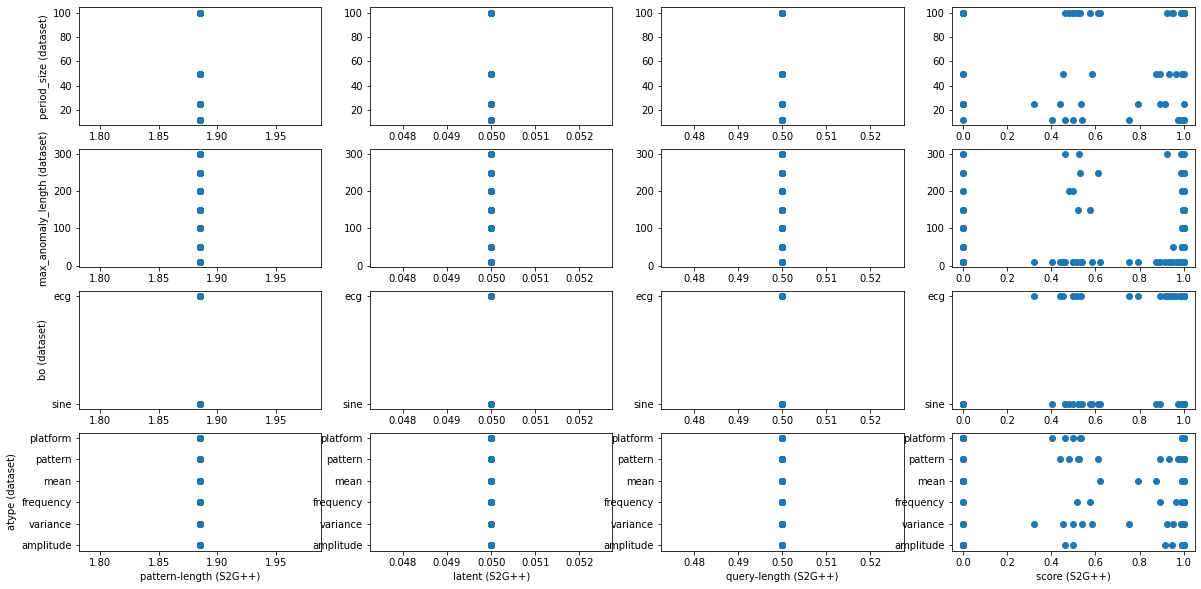

In [16]:
df_tmp = df[~df.score.isna()].copy()

xs = ["pattern-length", "latent", "query-length", "score"]
ys = ["period_size", "max_anomaly_length", "bo", "atype"]

fig, axs = plt.subplots(len(ys), len(xs))

for r, row in enumerate(ys):
    for c, col in enumerate(xs):
        ax = axs[r, c]
        ax.scatter(y=df_tmp[row], x=df_tmp[col])
        if r == len(ys)-1:
            ax.set_xlabel(col + " (S2G++)")
        if c == 0:
            ax.set_ylabel(row + " (dataset)")
plt.show()

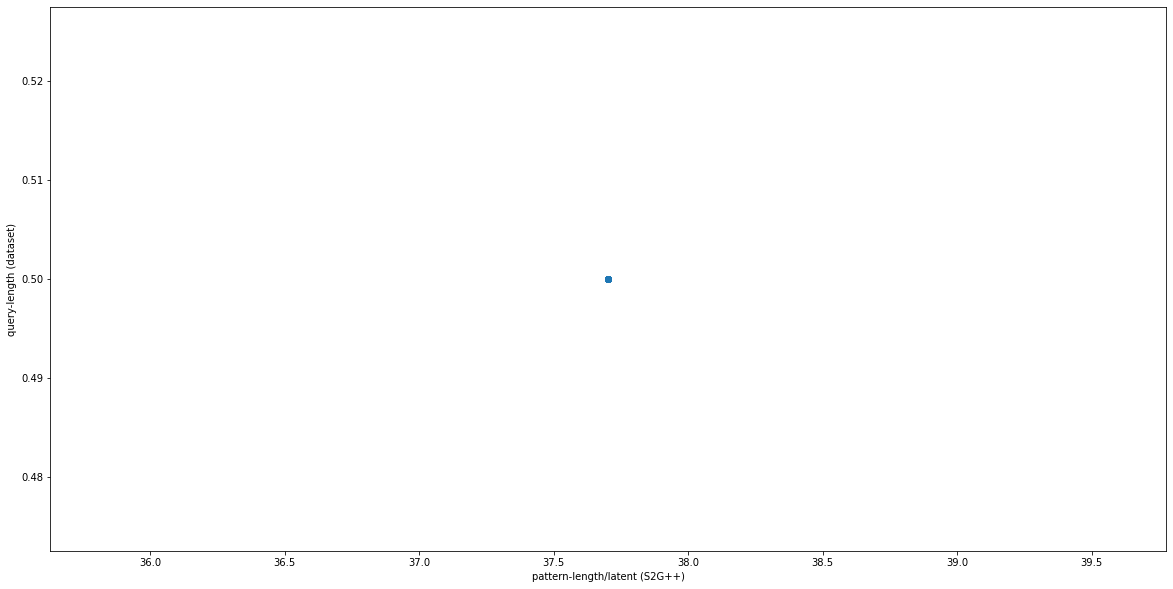

In [17]:
df_tmp = df[~df.score.isna()].copy()
df_tmp.loc[:, "pattern-length/latent"] = df_tmp["pattern-length"].astype(float) / df_tmp["latent"].astype(float)

xs = ["pattern-length/latent"]
ys = ["query-length"]

fig, axs = plt.subplots(len(ys), len(xs))

for r, row in enumerate(ys):
    for c, col in enumerate(xs):
        if len(ys) == 1 and len(xs) == 1:
            ax = axs
        elif len(ys) == 1 or len(xs) == 1:
            ax = axs[r+c]
        else:
            ax = axs[r, c]
        ax.scatter(y=df_tmp[row], x=df_tmp[col])
        if r == len(ys)-1:
            ax.set_xlabel(col + " (S2G++)")
        if c == 0:
            ax.set_ylabel(row + " (dataset)")
plt.show()

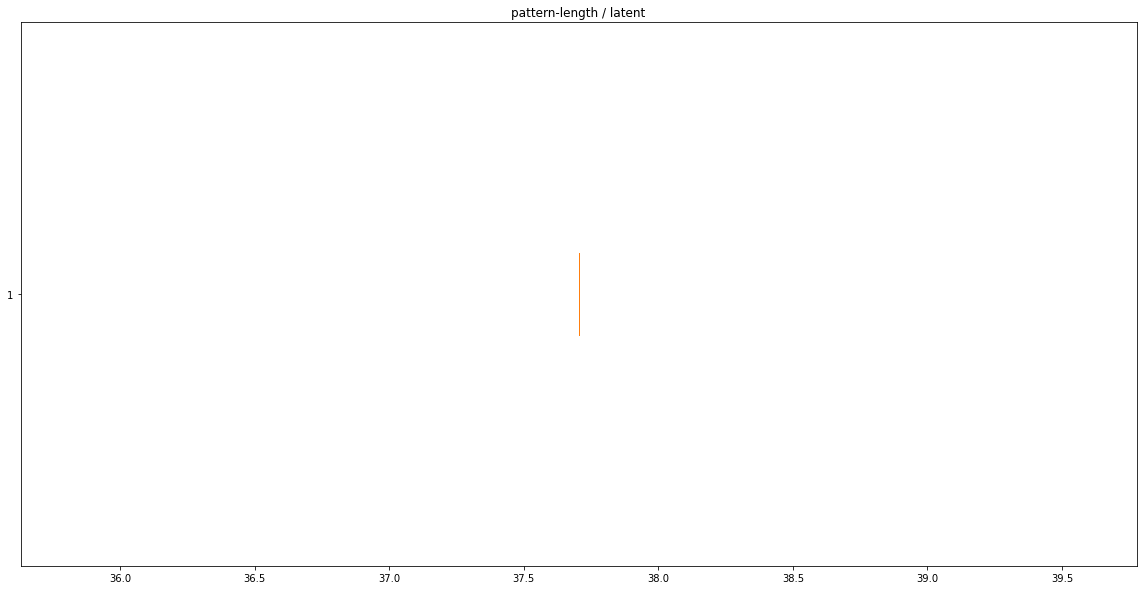

In [18]:
df_tmp = df[~df.score.isna()].copy()

a = "pattern-length"
b = "latent"

df_tmp.loc[:, f"{a}/{b}"] = df_tmp[a].astype(float) / df_tmp[b].astype(float)
plt.boxplot(df_tmp[f"{a}/{b}"], vert=False)
plt.title(f"{a} / {b}")
plt.show()

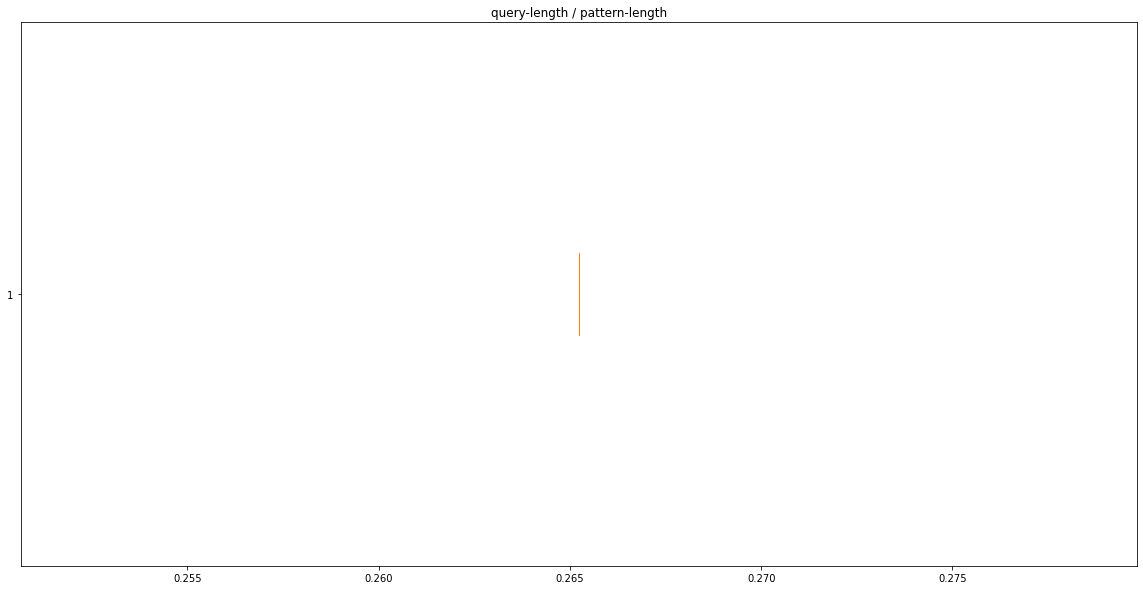

In [19]:
df_tmp = df[~df.score.isna()].copy()

a = "query-length"
b = "pattern-length"

df_tmp.loc[:, f"{a}/{b}"] = df_tmp[a].astype(float) / df_tmp[b].astype(float)
plt.boxplot(df_tmp[f"{a}/{b}"], vert=False)
plt.title(f"{a} / {b}")
plt.show()

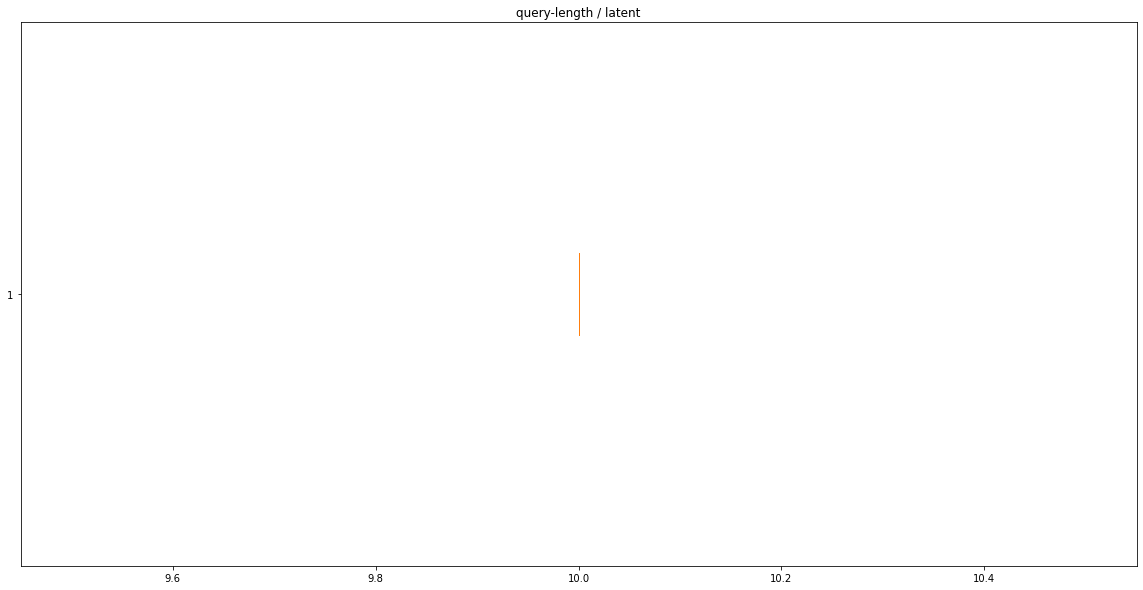

In [20]:
df_tmp = df[~df.score.isna()].copy()

a = "query-length"
b = "latent"

df_tmp.loc[:, f"{a}/{b}"] = df_tmp[a].astype(float) / df_tmp[b].astype(float)
plt.boxplot(df_tmp[f"{a}/{b}"], vert=False)
plt.title(f"{a} / {b}")
plt.show()

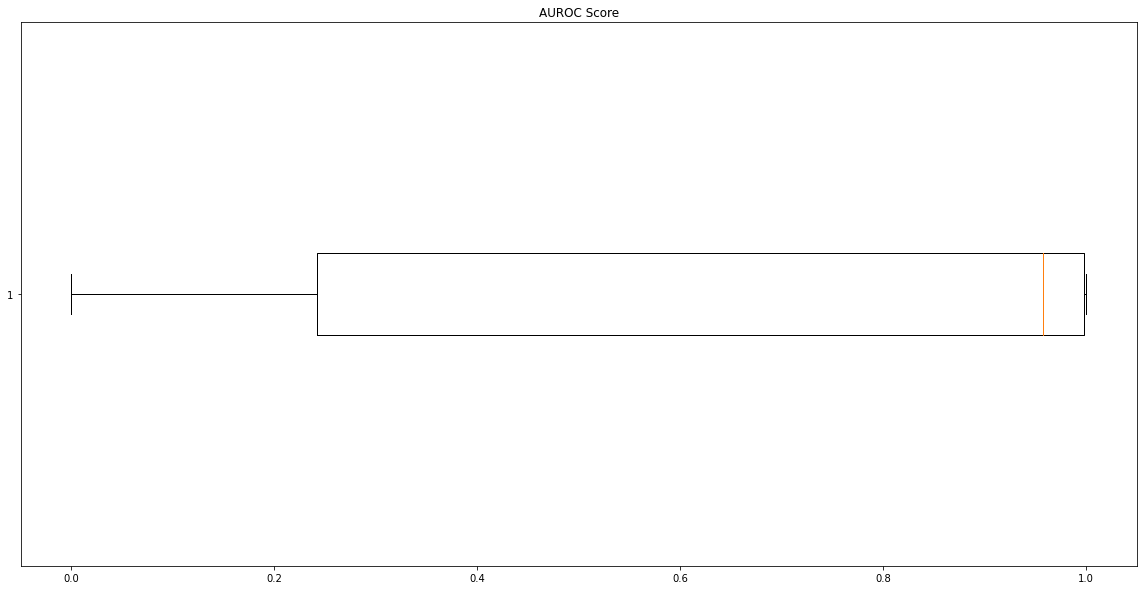

In [22]:
plt.boxplot(df[~df.score.isna()].score, vert=False)
plt.title("AUROC Score")
plt.show()

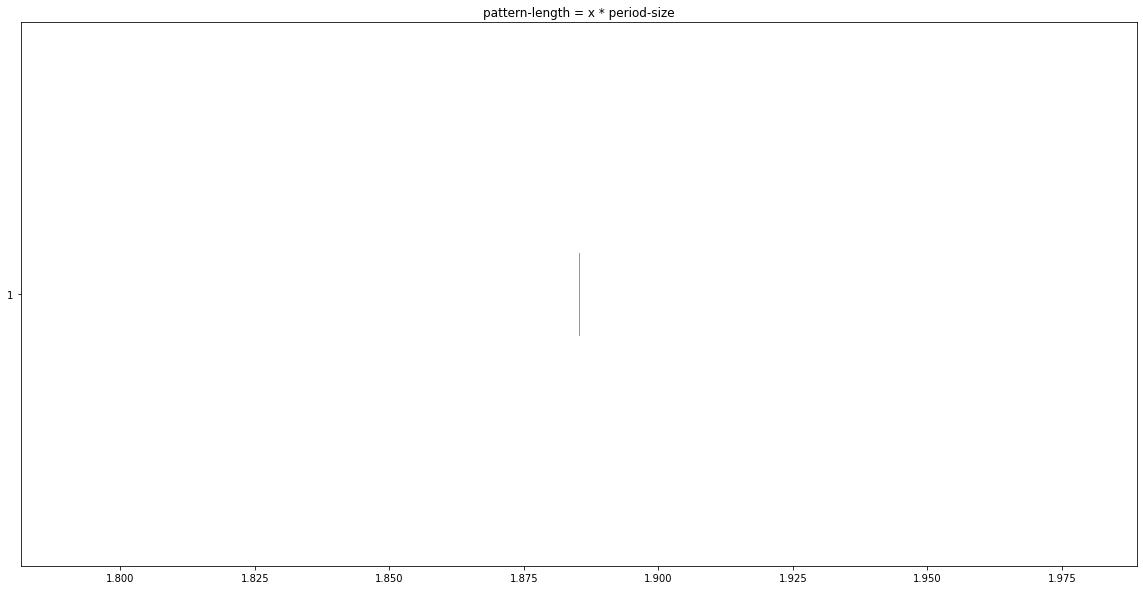

In [23]:
plt.boxplot(df[~df.score.isna()]["pattern-length"], vert=False)
plt.title("pattern-length = x * period-size")
plt.show()

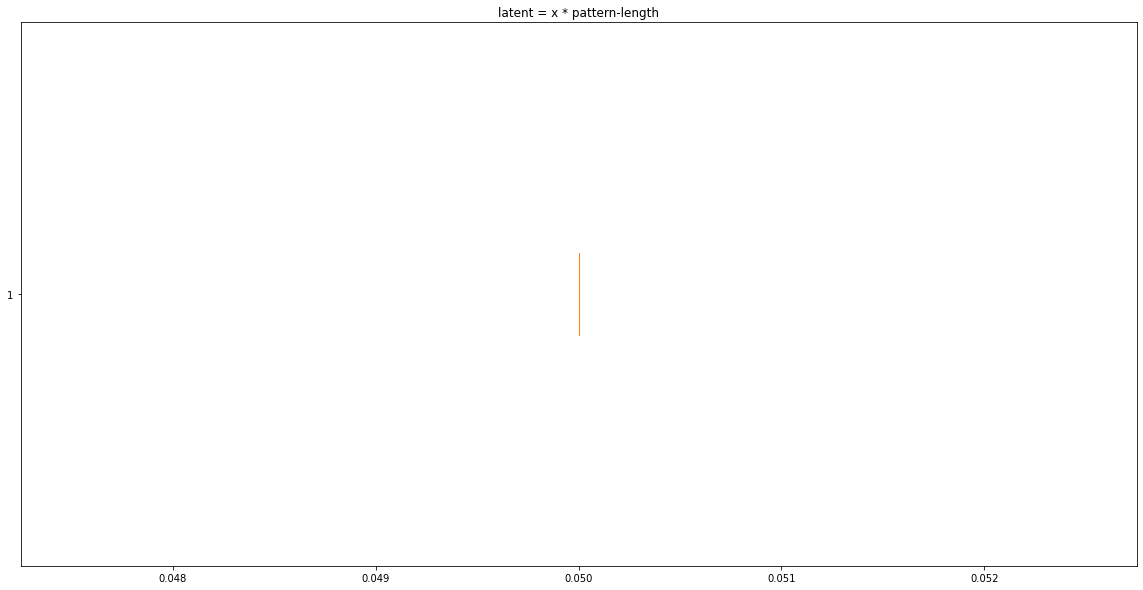

In [24]:
plt.boxplot(df[~df.score.isna()]["latent"], vert=False)
plt.title("latent = x * pattern-length")
plt.show()

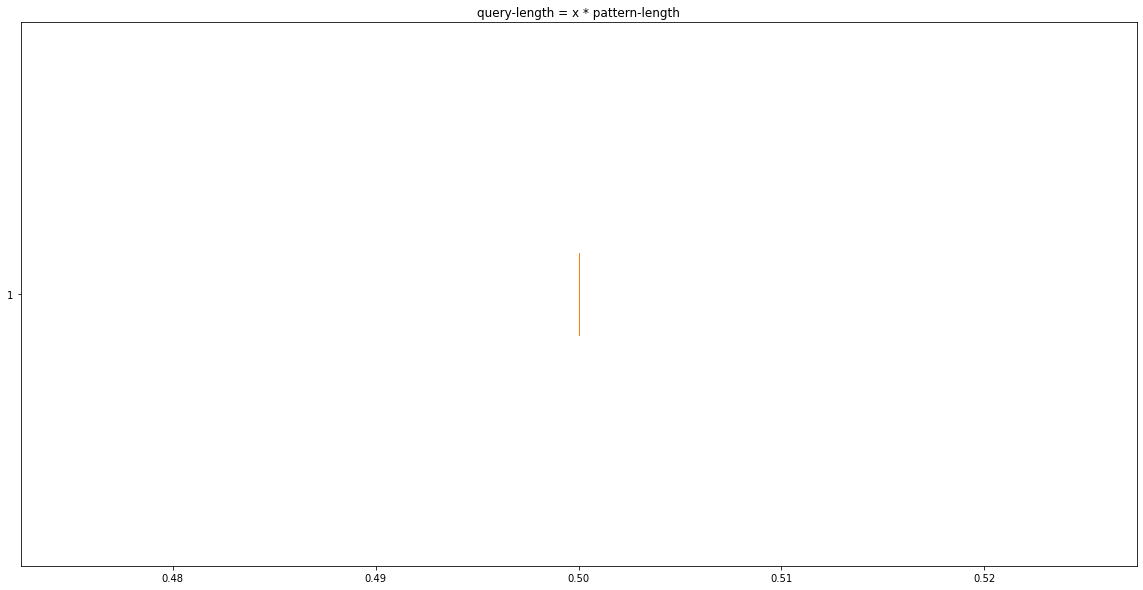

In [25]:
plt.boxplot(df[~df.score.isna()]["query-length"], vert=False)
plt.title("query-length = x * pattern-length")
plt.show()